In [542]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [543]:
data = pd.read_csv("SkillCraft1_Dataset.csv")

DATA EXPLORATION AND VISUALISATION

In [544]:
data.head(10)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
5,60,2,27,6,70,44.4570,0.000978,0.000255,2,0.000000,0.000000,0.002425,76.4405,98.7719,3.0965,16,0.000372,6,0.000000,0.000000
6,61,1,21,8,240,46.9962,0.000820,0.000169,6,0.000000,0.000045,0.001988,94.0227,90.5311,4.1017,15,0.000573,5,0.000000,0.000000
7,72,7,17,42,10000,212.6022,0.009040,0.000676,6,0.001164,0.001253,0.004952,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249
8,77,4,20,14,2708,117.4884,0.002944,0.000527,2,0.000019,0.000414,0.005399,52.0140,46.4321,3.3746,29,0.001035,7,0.000273,0.000470
9,81,4,18,24,800,155.9856,0.005054,0.000524,8,0.000025,0.000399,0.003569,24.4632,52.1538,6.5664,27,0.001310,6,0.000000,0.000000


In [545]:
leagueRank = data["LeagueIndex"].value_counts()
leagueRank.sort_index(inplace = True)
print(leagueRank)

1    167
2    347
3    553
4    811
5    806
6    621
7     35
8     55
Name: LeagueIndex, dtype: int64


In [546]:
rank_labels = {
    1 : "Bronze",
    2 : "Silver",
    3 : "Gold",
    4 : "Platinium",
    5 : "Diamond",
    6 : "Master",
    7 : "GrandMaster",
    8 : "Professional"
}
leagueRank.index = leagueRank.index.map(rank_labels)

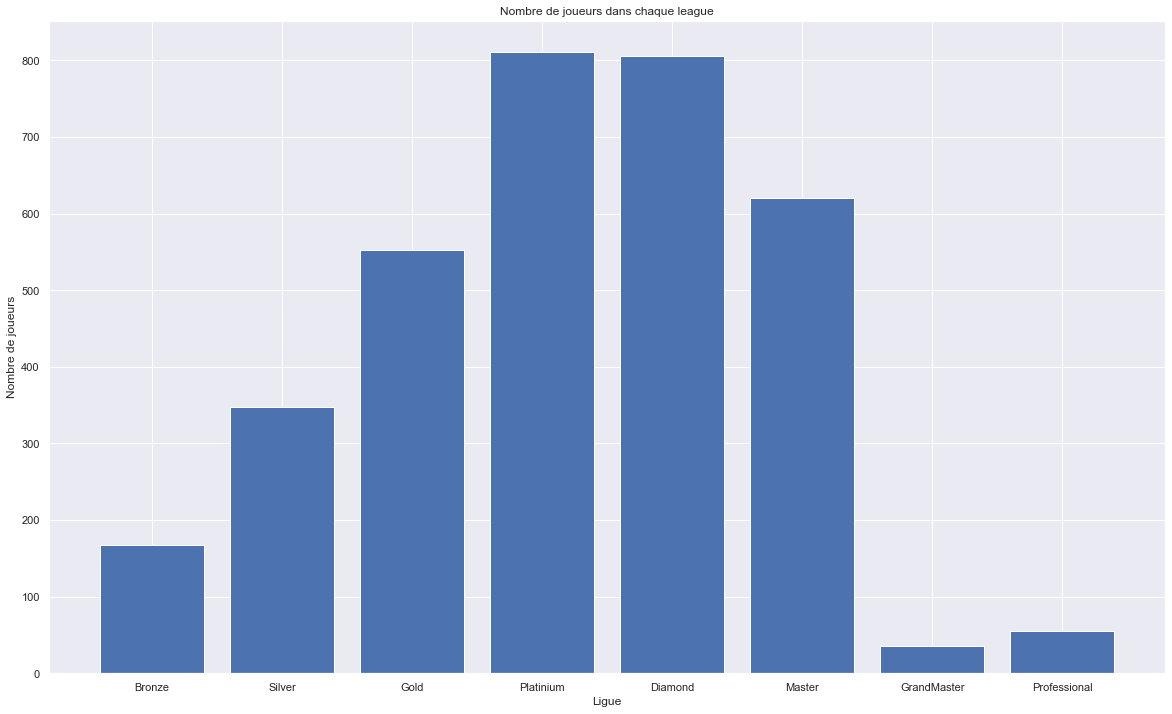

In [547]:
plt.figure(figsize=(20,12))
plt.bar(leagueRank.index, leagueRank.values)
plt.ylabel("Nombre de joueurs")
plt.xlabel("Ligue")
plt.title("Nombre de joueurs dans chaque league")
plt.show()

In [548]:
data_temp = data
data_temp["count"] = 1
data_temp.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,count
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,...,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000,1
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,...,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208,1
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,...,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189,1
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,...,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384,1
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,...,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019,1


In [549]:
data_temp_1 = data_temp.pivot_table(values="count", index="LeagueIndex", columns="Age", aggfunc="sum")
data_temp_1.sort_index()
data_temp_1.index = data_temp_1.index.map(rank_labels)
data_temp_1 = data_temp_1.fillna(0)
data_temp_1

Age,16,17,18,19,20,21,22,23,24,25,...,35,36,37,38,39,40,41,43,44,?
LeagueIndex,,,,,,,,,,,,,,,,,,,,,
Bronze,18.0,9.0,13.0,12.0,22.0,12.0,12.0,6.0,9.0,11.0,...,5.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
Silver,38.0,22.0,38.0,32.0,25.0,23.0,28.0,24.0,24.0,18.0,...,1.0,2.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0
Gold,48.0,43.0,56.0,53.0,47.0,44.0,47.0,47.0,32.0,26.0,...,3.0,5.0,1.0,4.0,1.0,2.0,1.0,0.0,0.0,0.0
Platinium,45.0,49.0,78.0,71.0,97.0,81.0,75.0,72.0,52.0,45.0,...,7.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
Diamond,55.0,71.0,81.0,68.0,80.0,96.0,81.0,59.0,58.0,51.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Master,50.0,51.0,56.0,73.0,86.0,83.0,68.0,42.0,48.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GrandMaster,2.0,3.0,3.0,4.0,0.0,5.0,3.0,9.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Professional,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0


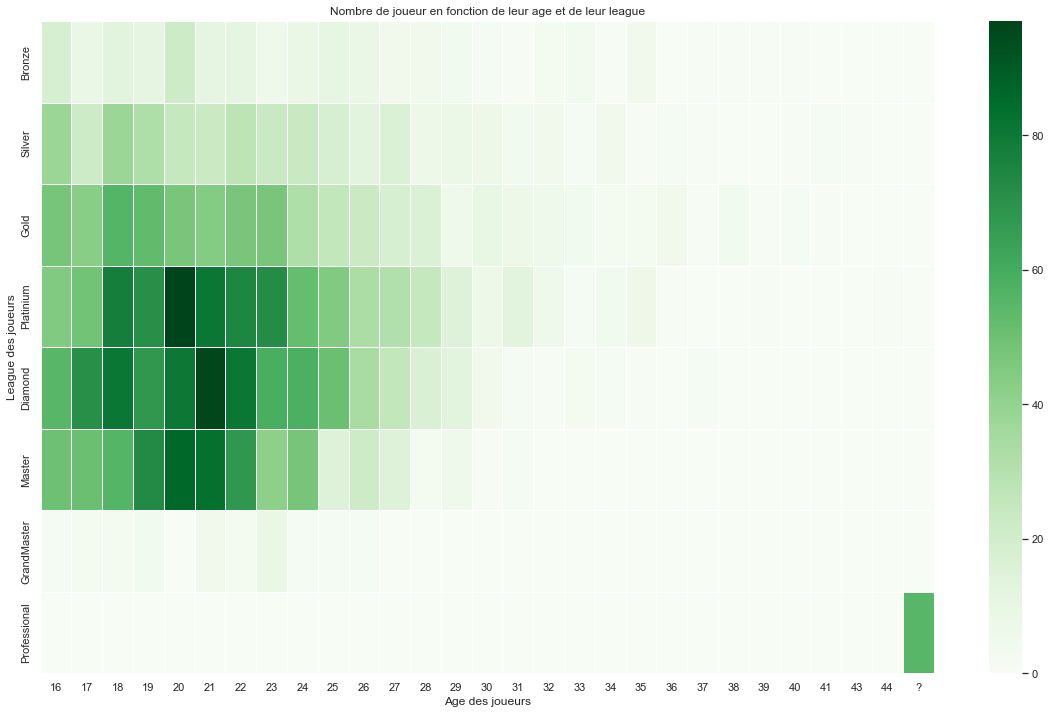

In [550]:
plt.figure(figsize=(20,12))
ax = sns.heatmap(data_temp_1, annot=False, fmt=".1f", linewidths=.5, cmap='Greens')
ax.set_title("Nombre de joueur en fonction de leur age et de leur league")
ax.set_xlabel("Age des joueurs")
ax.set_ylabel("League des joueurs")
plt.show()

In [551]:
data_temp_2 = data_temp[data_temp['TotalHours'] != '?']
data_temp_2 = data_temp_2.astype({'TotalHours':np.int32 })
data_temp_2 = data_temp_2.pivot_table(values="TotalHours", index="LeagueIndex", aggfunc="mean")
data_temp_2.index = data_temp_2.index.map(rank_labels)

In [552]:
data_temp_2

,TotalHours
LeagueIndex,
Bronze,264.191617
Silver,331.409222
Gold,493.792043
Platinium,588.006165
Diamond,2024.493781
Master,988.405797
GrandMaster,1581.028571


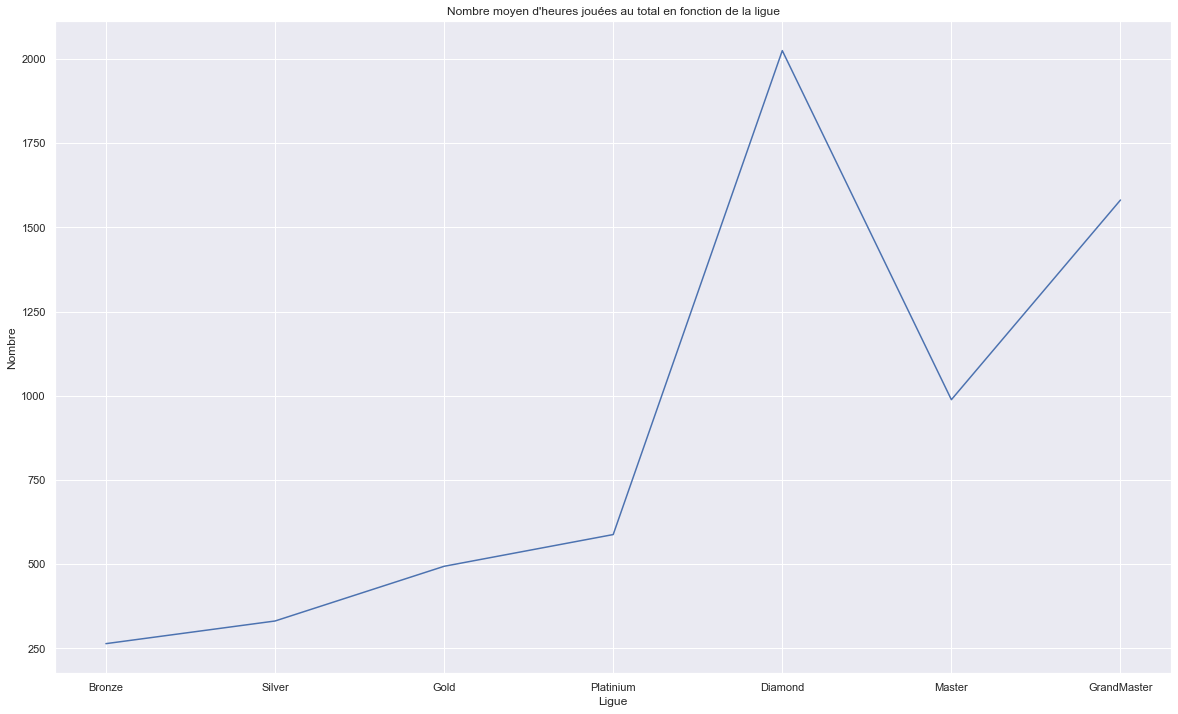

In [553]:
plt.figure(figsize=(20,12))
plt.plot(data_temp_2)
plt.ylabel("Nombre")
plt.xlabel("Ligue")
plt.title("Nombre moyen d'heures jouées au total en fonction de la ligue")
plt.show()

Il n'y a pas d'info sur l'age, les heures par semaine et le nombre total d'heure pour la catégorie pro:

In [554]:
data_pro = data_temp[data_temp['LeagueIndex'] == 8]
data_pro.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,count
3340,10001,8,?,?,?,189.7404,0.004582,0.000655,4,0.000073,...,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.0,1
3341,10005,8,?,?,?,287.8128,0.029040,0.001041,9,0.000231,...,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.0,1
3342,10006,8,?,?,?,294.0996,0.029640,0.001076,6,0.000302,...,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.0,1
3343,10015,8,?,?,?,274.2552,0.018121,0.001264,8,0.000053,...,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0.0,1
3344,10016,8,?,?,?,274.3404,0.023131,0.000739,8,0.000622,...,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0.0,1


In [555]:
data_temp = data
data_temp.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,count
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,...,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000,1
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,...,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208,1
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,...,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189,1
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,...,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384,1
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,...,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019,1


In [556]:
data_temp['LeagueIndex'] = data_temp['LeagueIndex'].map(rank_labels)

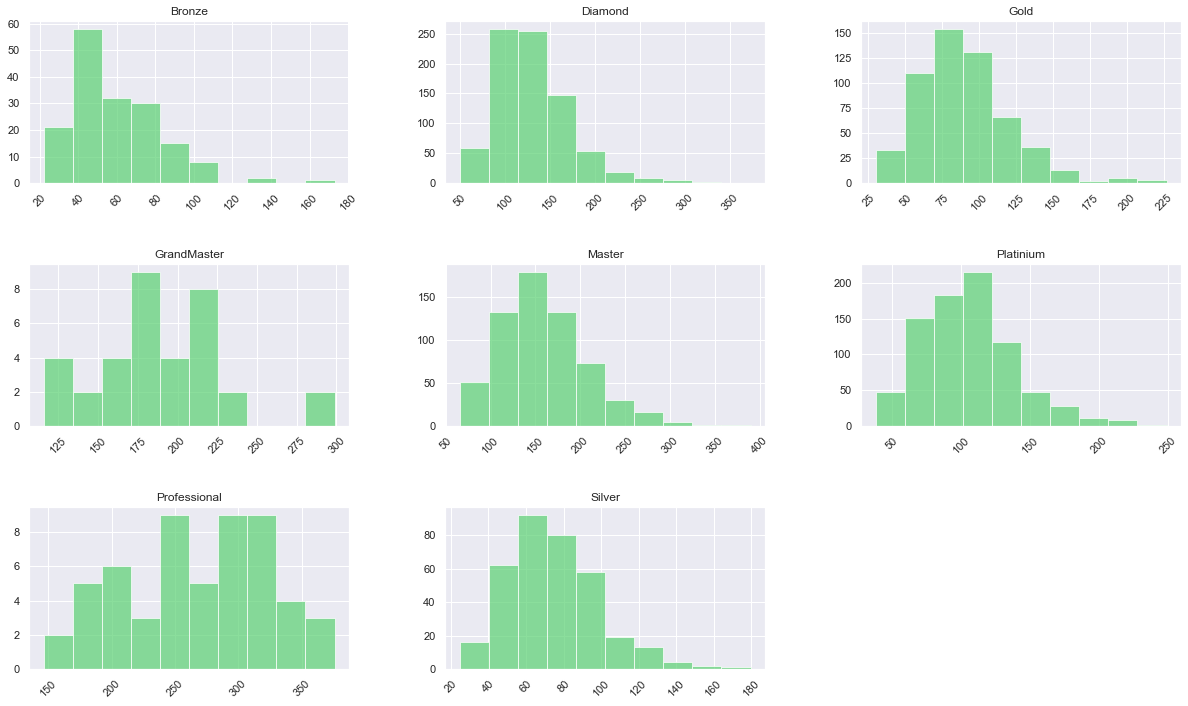

In [557]:
data_temp.hist(column='APM', by='LeagueIndex',figsize=(20,12), color = '#5AD172', alpha = 0.7, rot = 45)
plt.show()

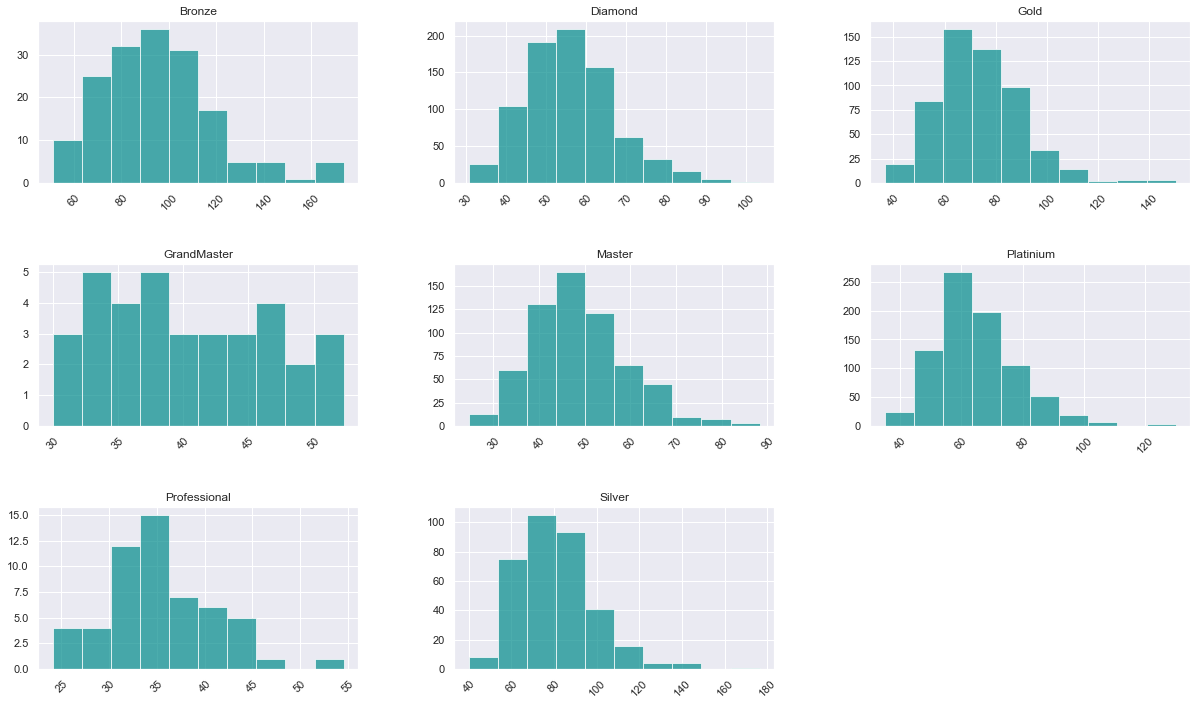

In [558]:
data_temp.hist(column='ActionLatency', by='LeagueIndex',figsize=(20,12), color = '#008B8B', alpha = 0.7, rot = 45)
plt.show()

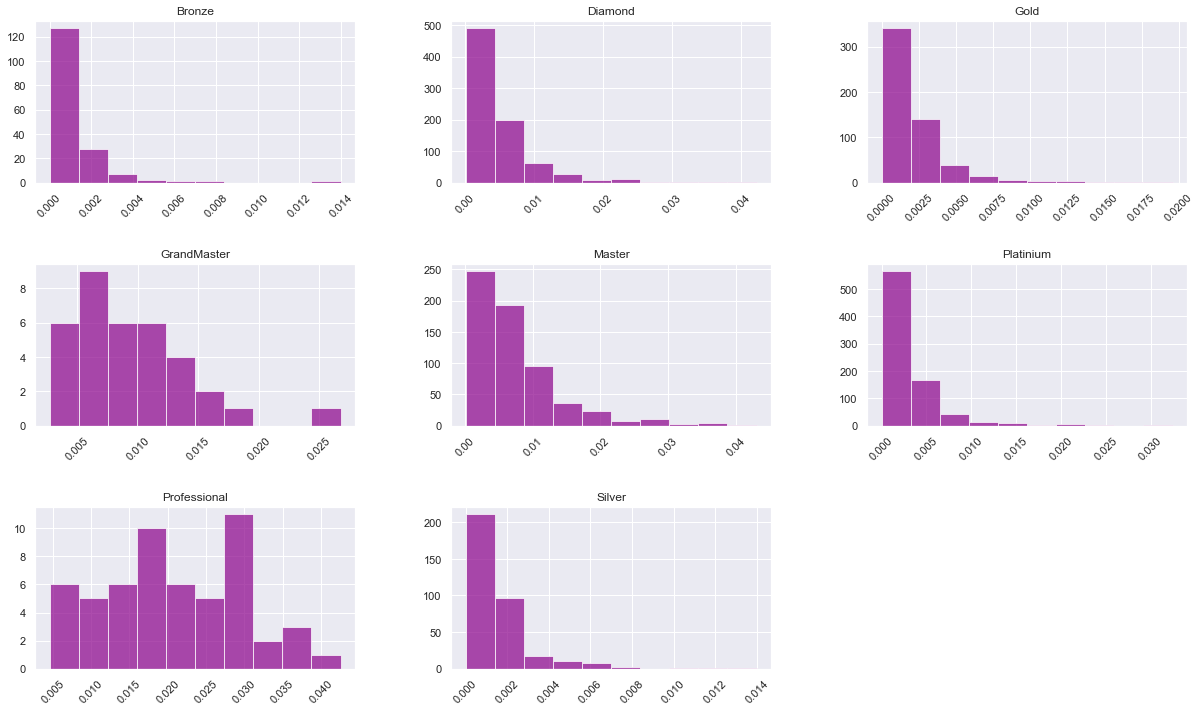

In [559]:
data_temp.hist(column='SelectByHotkeys', by='LeagueIndex',figsize=(20,12), color = '#8B008B', alpha = 0.7, rot = 45)
plt.show()

In [560]:
data.head(10)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,count
0,52,Diamond,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,...,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000,1
1,55,Diamond,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,...,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208,1
2,56,Platinium,30,10,200,69.9612,0.001101,0.000336,4,0.000294,...,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189,1
3,57,Gold,19,20,400,107.6016,0.001034,0.000213,1,0.000053,...,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384,1
4,58,Gold,32,10,500,122.8908,0.001136,0.000327,2,0.000000,...,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019,1
5,60,Silver,27,6,70,44.4570,0.000978,0.000255,2,0.000000,...,0.002425,76.4405,98.7719,3.0965,16,0.000372,6,0.000000,0.000000,1
6,61,Bronze,21,8,240,46.9962,0.000820,0.000169,6,0.000000,...,0.001988,94.0227,90.5311,4.1017,15,0.000573,5,0.000000,0.000000,1
7,72,GrandMaster,17,42,10000,212.6022,0.009040,0.000676,6,0.001164,...,0.004952,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249,1
8,77,Platinium,20,14,2708,117.4884,0.002944,0.000527,2,0.000019,...,0.005399,52.0140,46.4321,3.3746,29,0.001035,7,0.000273,0.000470,1
9,81,Platinium,18,24,800,155.9856,0.005054,0.000524,8,0.000025,...,0.003569,24.4632,52.1538,6.5664,27,0.001310,6,0.000000,0.000000,1


In [561]:
data_temp = pd.DataFrame(data = data, columns=['LeagueIndex', 'MinimapAttacks','MinimapRightClicks', 'TotalMapExplored', 'WorkersMade'])
data_Master = data_temp[data_temp['LeagueIndex'] == 'Master']
data_Master.head()
data_Gold = data_temp[data_temp['LeagueIndex'] == 'Gold']
data_Gold.head()
data_Gold_Master = data_Gold.append(data_Master)
data_Gold_Master.head()


,LeagueIndex,MinimapAttacks,MinimapRightClicks,TotalMapExplored,WorkersMade
3,Gold,0.000053,0.000543,19,0.000426
4,Gold,0.000000,0.001329,15,0.001174
10,Gold,0.000000,0.000822,24,0.001593
12,Gold,0.000024,0.000145,16,0.000748
13,Gold,0.000087,0.000035,21,0.001494


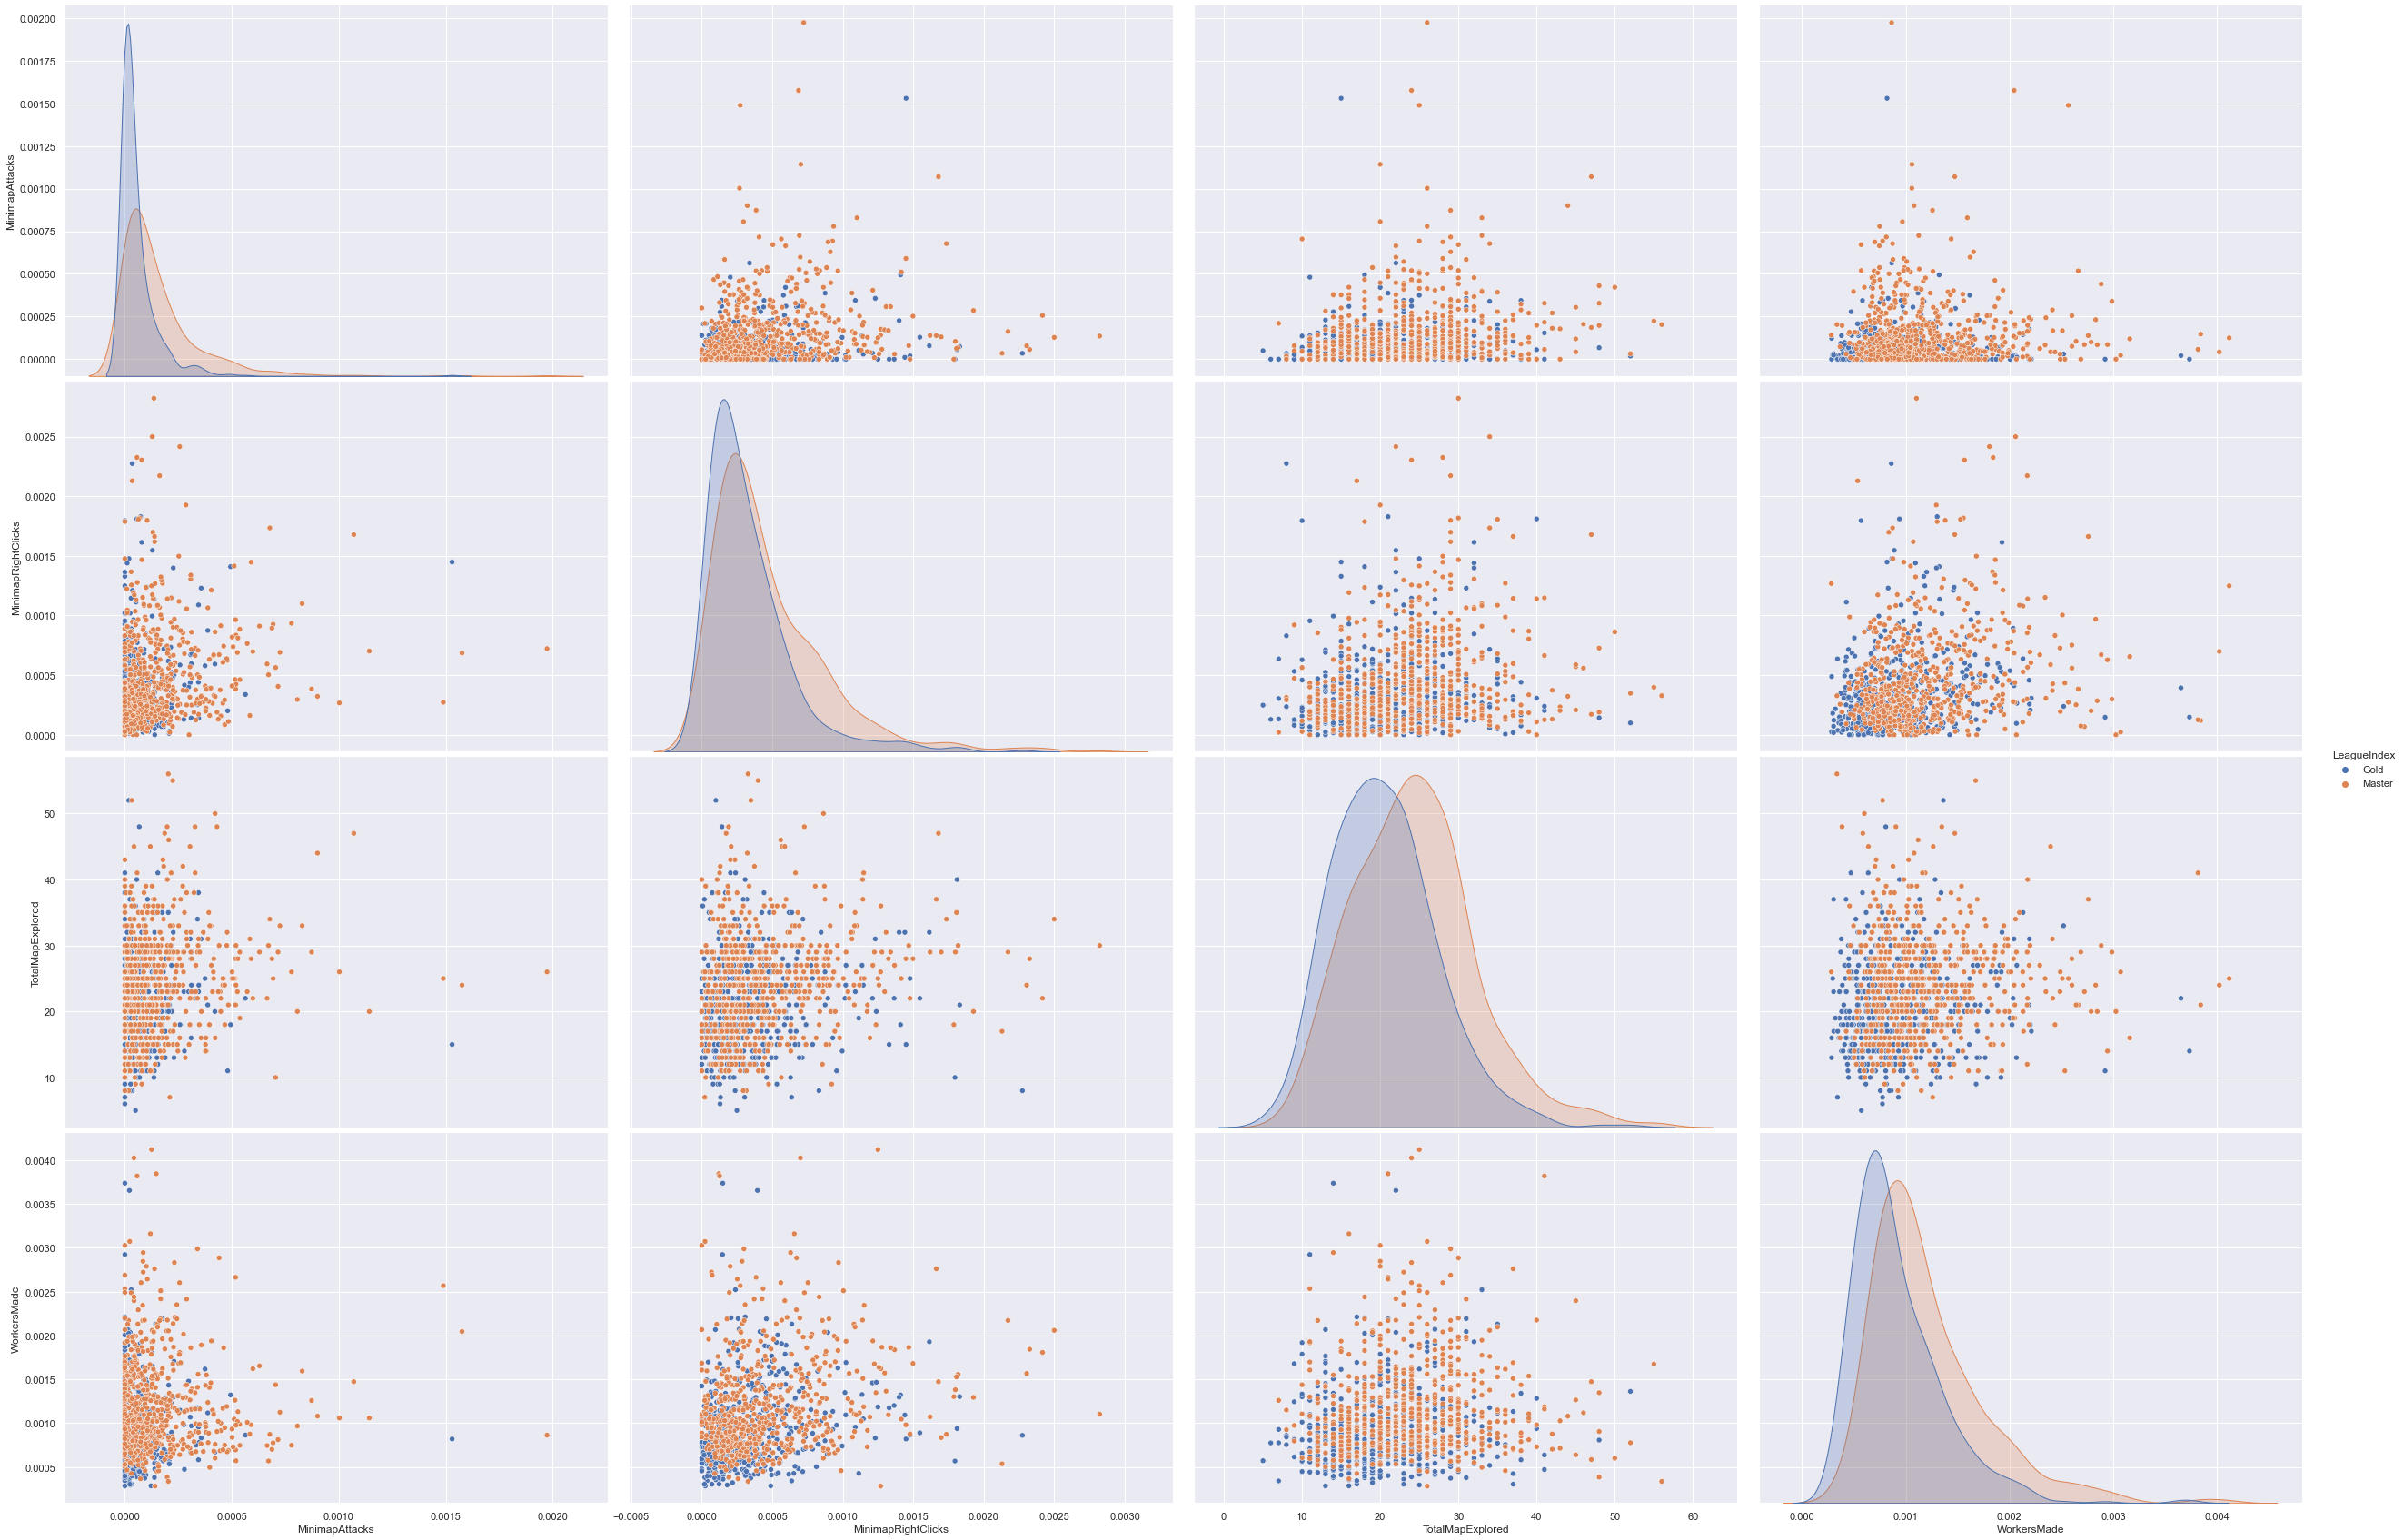

In [562]:
sns.pairplot(data_Gold_Master, hue='LeagueIndex', height=6, aspect=1.5);

In [563]:
data_temp = pd.DataFrame(data = data, columns=['LeagueIndex', 'MinimapAttacks','MinimapRightClicks', 'TotalMapExplored', 'WorkersMade'])
data_pro = data_temp[data_temp['LeagueIndex'] == 'Professional']
data_pro.head()
data_bronze = data_temp[data_temp['LeagueIndex'] == 'Bronze']
data_bronze.head()
data_bronze_pro = data_bronze.append(data_pro)
data_bronze_pro.head()

,LeagueIndex,MinimapAttacks,MinimapRightClicks,TotalMapExplored,WorkersMade
6,Bronze,0.000000,0.000045,15,0.000573
36,Bronze,0.000058,0.000204,11,0.000584
106,Bronze,0.000000,0.000062,23,0.000542
167,Bronze,0.000037,0.000481,14,0.001332
187,Bronze,0.000000,0.000615,36,0.001292


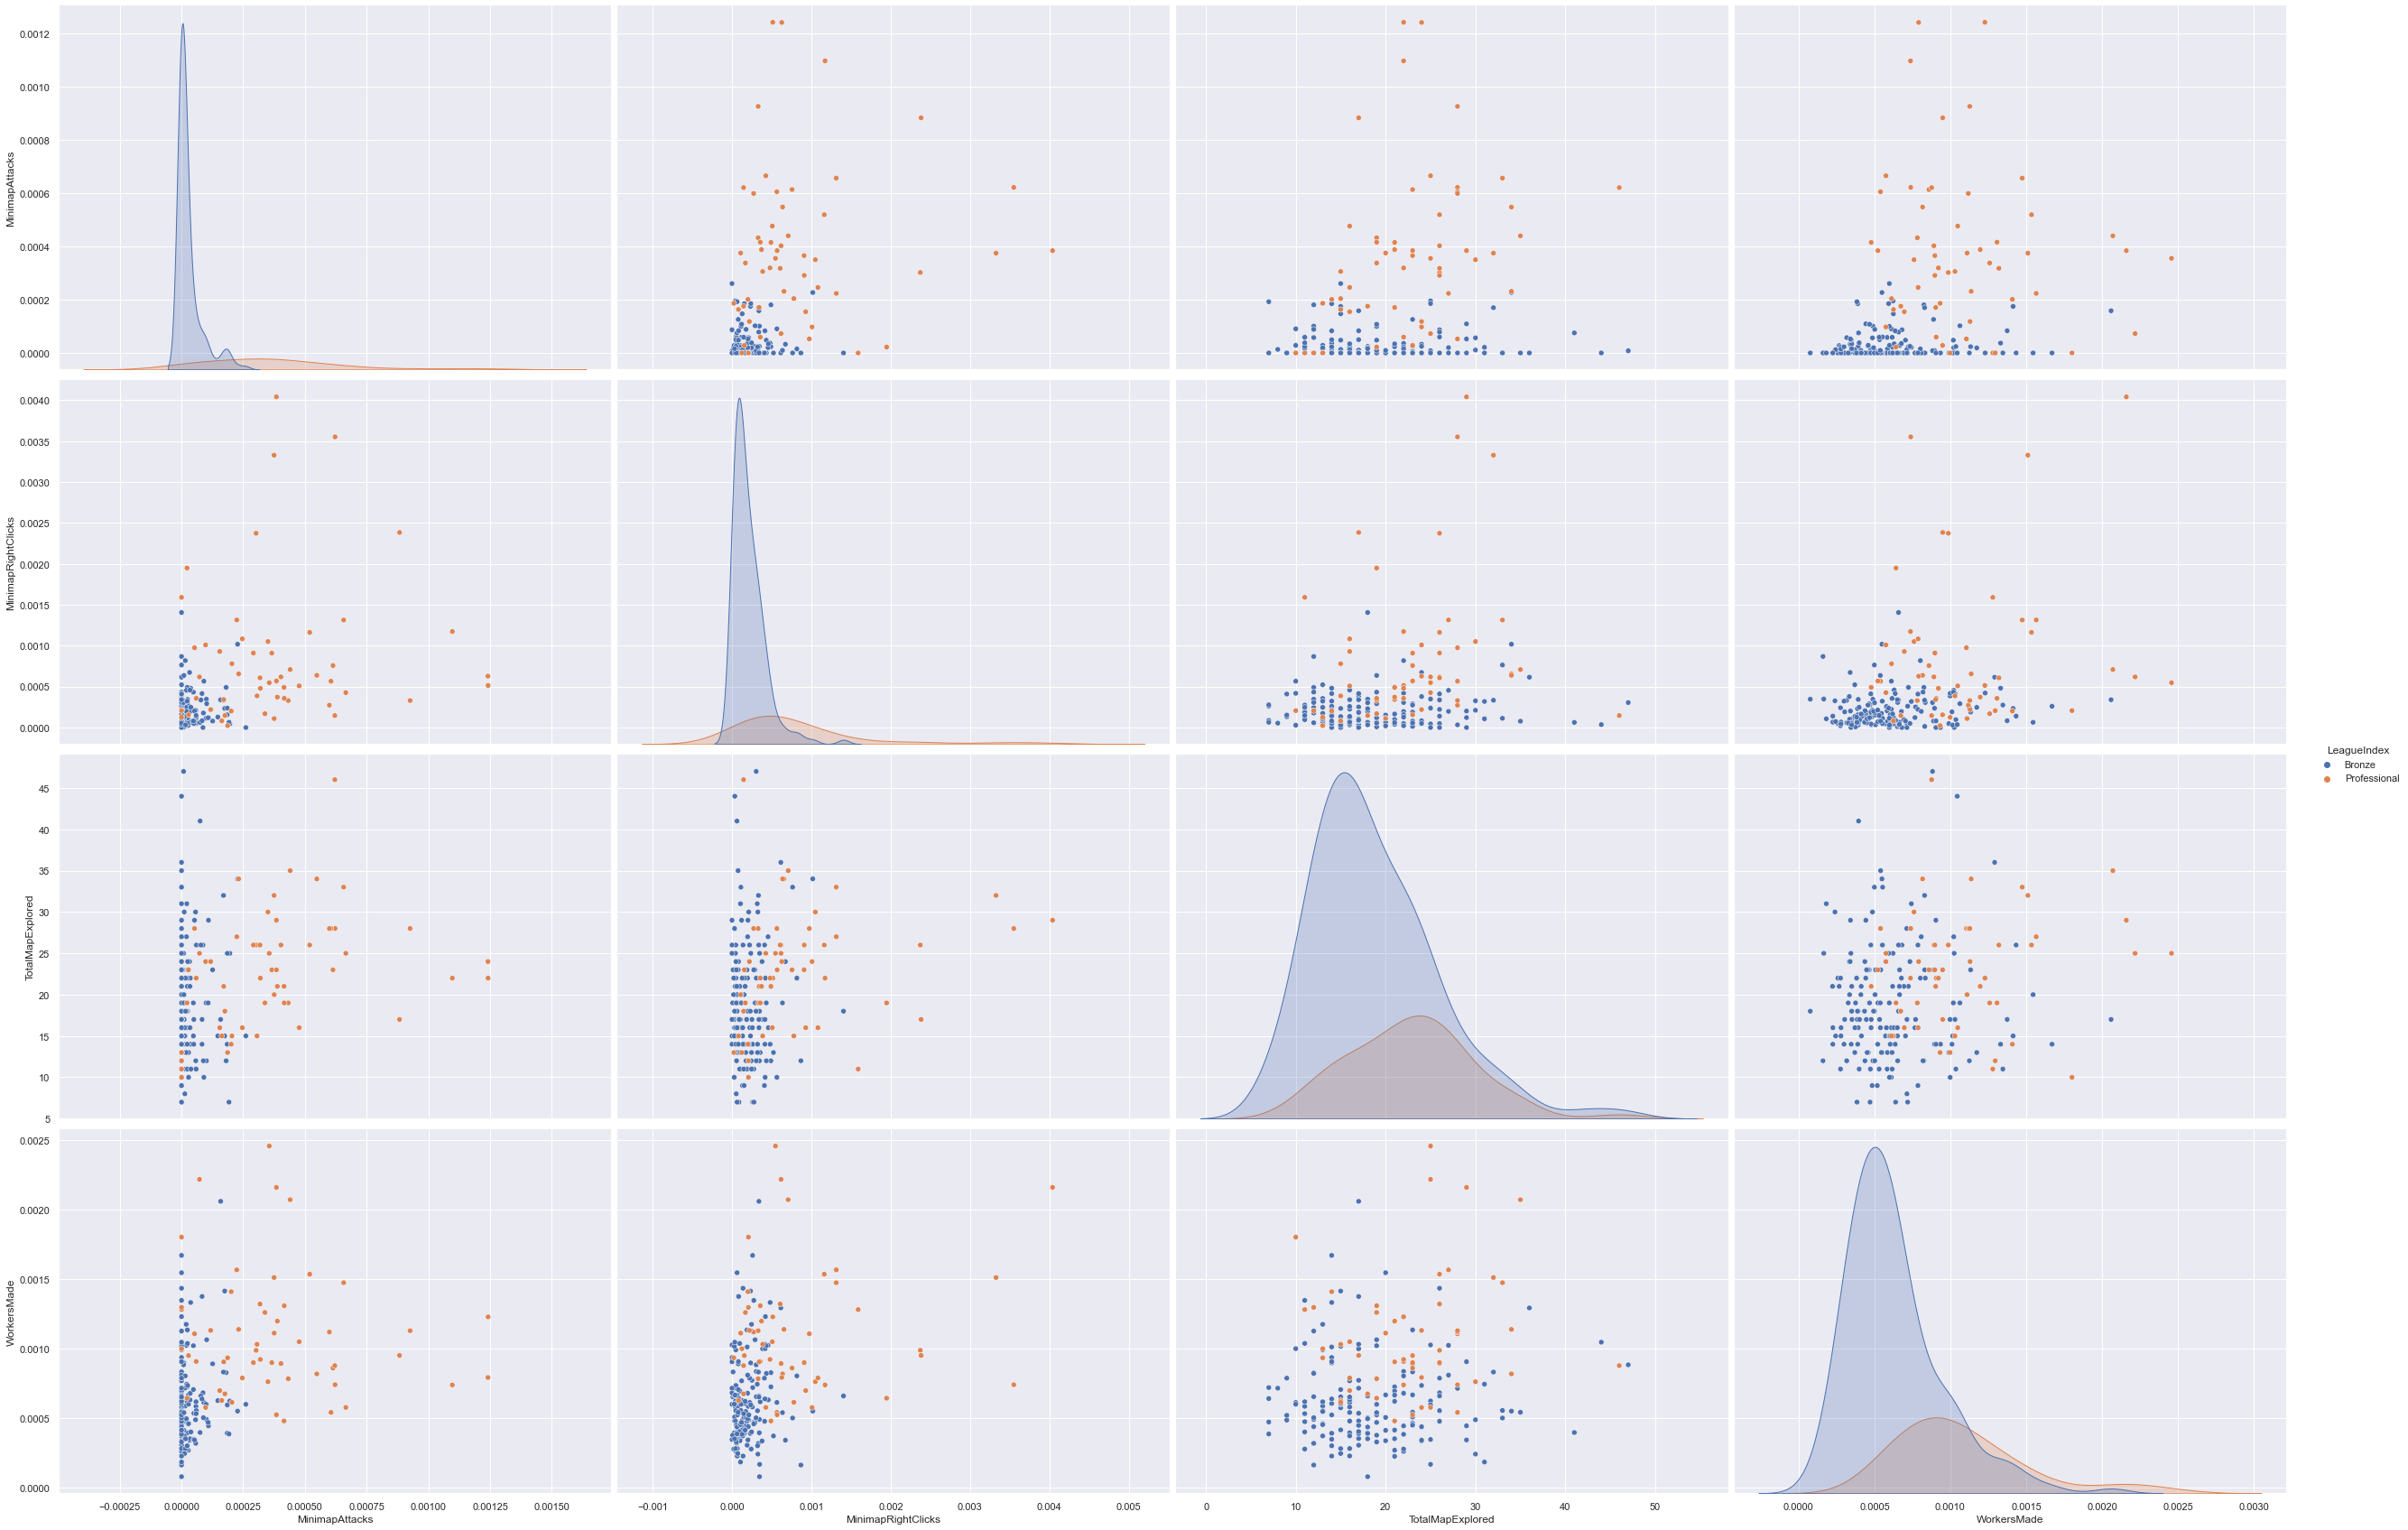

In [564]:
sns.pairplot(data_bronze_pro, hue='LeagueIndex', height=6, aspect=1.5);

MODELING

In [565]:
data_temp = pd.read_csv("SkillCraft1_Dataset.csv")
data_temp.drop(data_temp.loc[data_temp['LeagueIndex']==8].index, inplace=True)
data_temp.drop(index = 1841, inplace=True)
data_temp.drop(index=358, inplace=True)
data_temp

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,9261,4,20,8,400,158.1390,0.013829,0.000504,7,0.000217,0.000313,0.003583,36.3990,66.2718,4.5097,30,0.001035,7,0.0,0.000287
3336,9264,5,16,56,1500,186.1320,0.006951,0.000360,6,0.000083,0.000166,0.005414,22.8615,34.7417,4.9309,38,0.001343,7,0.0,0.000388
3337,9265,4,21,8,100,121.6992,0.002956,0.000241,8,0.000055,0.000208,0.003690,35.5833,57.9585,5.4154,23,0.002014,7,0.0,0.000000
3338,9270,3,20,28,400,134.2848,0.005424,0.000182,5,0.000000,0.000480,0.003205,18.2927,62.4615,6.0202,18,0.000934,5,0.0,0.000000


In [566]:
data_model = data_temp[['LeagueIndex','APM','SelectByHotkeys','ActionLatency','TotalMapExplored']]
data_model

,LeagueIndex,APM,SelectByHotkeys,ActionLatency,TotalMapExplored
0,5,143.7180,0.003515,40.8673,28
1,5,129.2322,0.003304,42.3454,22
2,4,69.9612,0.001101,75.3548,22
3,3,107.6016,0.001034,53.7352,19
4,3,122.8908,0.001136,62.0813,15
...,...,...,...,...,...
3335,4,158.1390,0.013829,66.2718,30
3336,5,186.1320,0.006951,34.7417,38
3337,4,121.6992,0.002956,57.9585,23
3338,3,134.2848,0.005424,62.4615,18


In [567]:
from sklearn.model_selection import train_test_split

In [568]:
y = data_model['LeagueIndex']
X = data_model.drop('LeagueIndex',axis=1)

In [569]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [570]:
from sklearn.preprocessing import MinMaxScaler

In [571]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [572]:
from sklearn import svm

In [573]:
modelSVC = svm.SVC()
modelSVC.fit(X_train_scaled,y_train)

SVC()

In [574]:
modelSVC.score(X_train_scaled,y_train)

0.40149812734082396

In [575]:
modelSVC.score(scaler.transform(X_test),y_test)

0.36077844311377244

In [576]:
from sklearn.linear_model import SGDClassifier

In [577]:
modelSGD = SGDClassifier(loss="log", penalty="elasticnet", max_iter=100)
modelSGD.fit(X_train_scaled,y_train)

SGDClassifier(loss='log', max_iter=100, penalty='elasticnet')

In [578]:
modelSGD.score(X_train_scaled,y_train)

0.35842696629213483

In [579]:
modelSGD.score(scaler.transform(X_test),y_test)

0.31736526946107785

In [580]:
from sklearn.neighbors import NearestCentroid

In [581]:
modelNC = NearestCentroid()
modelNC.fit(X_train_scaled,y_train)

NearestCentroid()

In [582]:
modelNC.score(X_train_scaled,y_train)

0.30749063670411986

In [583]:
modelNC.score(scaler.transform(X_test),y_test)

0.27245508982035926

In [584]:
from sklearn import tree

In [585]:
modelTree = tree.DecisionTreeClassifier()
modelTree.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [586]:
modelTree.score(X_train_scaled,y_train)

1.0

In [587]:
modelTree.score(scaler.transform(X_test),y_test)

0.2694610778443114

In [588]:
from sklearn.neighbors import KNeighborsClassifier

In [589]:
from sklearn.model_selection import cross_val_score

In [590]:
print(cross_val_score(KNeighborsClassifier(), X_train_scaled, y_train, cv = 5, scoring = 'accuracy').mean())

0.3292134831460674


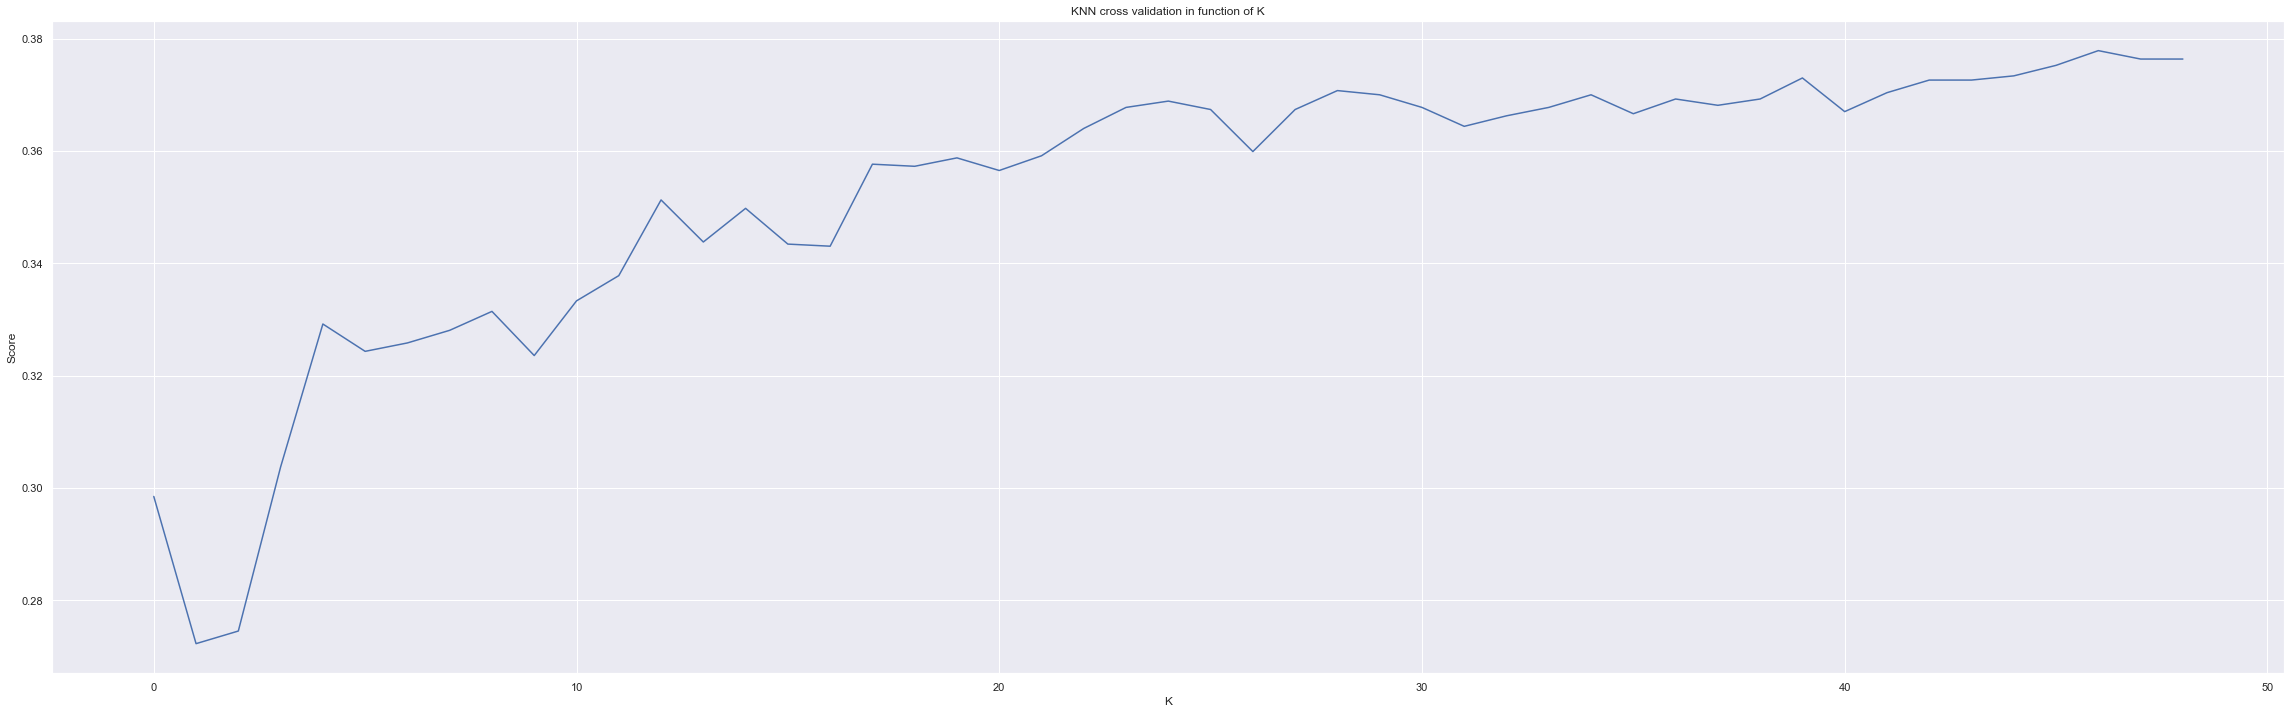

In [591]:
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), X_train_scaled, y_train, cv = 5, scoring = 'accuracy').mean()
    val_score.append(score)
plt.plot(val_score)
plt.title('KNN cross validation in function of K')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()